In [101]:
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

# Monter Google Drive

In [102]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Création d'un générateur d'images avec augmentation des données


In [103]:
datagen = ImageDataGenerator(
    rotation_range=15,  # Réduire la rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,  # Moins de zoom
    horizontal_flip=True,
    fill_mode='nearest'
)


# Chargement et prétraitement des images d'entraînement avec augmentation





In [104]:
training_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/pommes dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

Found 118 images belonging to 2 classes.


# Chargement des images de validation

In [105]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/pommes dataset/valide',
    labels="inferred",
    label_mode="categorical",
    image_size=(64, 64),
    batch_size=32,
    shuffle=True
)

Found 29 files belonging to 2 classes.


# Construction du modèle CNN

In [106]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=[64, 64, 3]),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')])

# Compilation du modèle

In [107]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Affichage du résumé du modèle

In [108]:
cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,620,450 (25.26 MB)

 Trainable params: 6,620,450 (25.26 MB)

 Non-trainable params: 0 (0.00 B)

# Entraînement du modèle

In [129]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=7)


Epoch 1/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 946ms/step - accuracy: 0.6962 - loss: 0.5667 - val_accuracy: 0.6897 - val_loss: 0.6248
Epoch 2/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 801ms/step - accuracy: 0.6748 - loss: 0.6170 - val_accuracy: 0.8621 - val_loss: 0.5824
Epoch 3/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 729ms/step - accuracy: 0.7225 - loss: 0.5736 - val_accuracy: 0.6552 - val_loss: 0.5164
Epoch 4/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.6863 - loss: 0.5645 - val_accuracy: 0.7586 - val_loss: 0.5058
Epoch 5/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7575 - loss: 0.4926 - val_accuracy: 0.7586 - val_loss: 0.5638
Epoch 6/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - accuracy: 0.7715 - loss: 0.5508 - val_accuracy: 0.6897 - val_loss: 0.5652
Epoch 7/7
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - accuracy: 0.7635 - loss: 0.5013 - val_accuracy: 0.6207 - val_loss: 0.5341


# Évaluation du modèle


In [130]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.7228 - loss: 0.5234
Training accuracy: 0.7627118825912476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.6207 - loss: 0.5341
Validation accuracy: 0.6206896305084229


# Sauvegarde du modèle


In [131]:
cnn.save('/content/drive/MyDrive/pommes dataset/trained_modelpp.h5')

# Sauvegarde de l'historique d'entraînement

In [132]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6779661178588867,
  0.7033898234367371,
  0.694915235042572,
  0.694915235042572,
  0.7542372941970825,
  0.7542372941970825,
  0.7457627058029175],
 'loss': [0.5987036824226379,
  0.5917379260063171,
  0.5743151307106018,
  0.6007435917854309,
  0.49547436833381653,
  0.5598352551460266,
  0.5172120332717896],
 'val_accuracy': [0.6896551847457886,
  0.8620689511299133,
  0.6551724076271057,
  0.7586206793785095,
  0.7586206793785095,
  0.6896551847457886,
  0.6206896305084229],
 'val_loss': [0.6247508525848389,
  0.5823504328727722,
  0.5163980722427368,
  0.5058000683784485,
  0.5637881755828857,
  0.5651631951332092,
  0.5340676307678223]}

In [133]:
training_history_dict = training_history.history
with open('/content/drive/MyDrive/pommes dataset/training_hist.json', 'w') as f:
    json.dump(training_history_dict, f)


# Affichage des clés de l'historique

In [134]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Affichage de l'accuracy de validation


In [135]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1] * 100))


Validation set Accuracy: 62.068963050842285 %


# Visualisation de l'accuracy


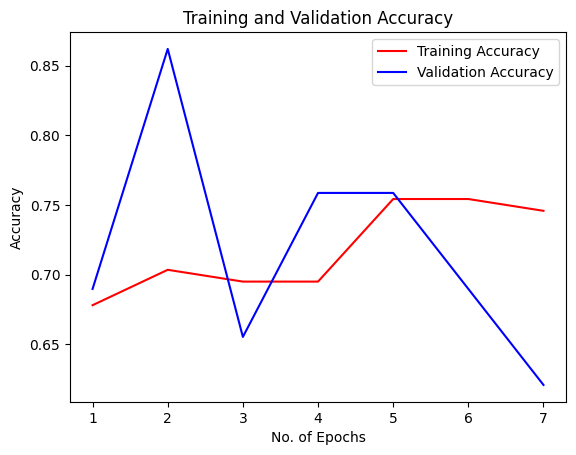

In [137]:
epochs = range(1, 8)
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Chargement et évaluation du dataset de test


In [138]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/pommes dataset/test',
    labels="inferred",
    label_mode="categorical",
    image_size=(64, 64),
    batch_size=32,
    shuffle=True
)
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

Found 34 files belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7102 - loss: 0.5508 
Test accuracy: 0.7058823704719543
